<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Refined-version" data-toc-modified-id="Refined-version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Refined version</a></span></li></ul></div>

In [234]:
import pandas as pd
import editdistance
from tqdm import tqdm_notebook as tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
richelieu = 'richelieu'

In [456]:
df = pd.read_csv('strict_adressing.csv')
df.dropna(inplace=True)
df.rename(columns={'Unnamed: 0': 'Doc ID'}, inplace=True)

In [476]:
df.columns

Index(['Doc ID', 'Nom', 'Métier', 'Rue', 'Numéro', 'annee'], dtype='object')

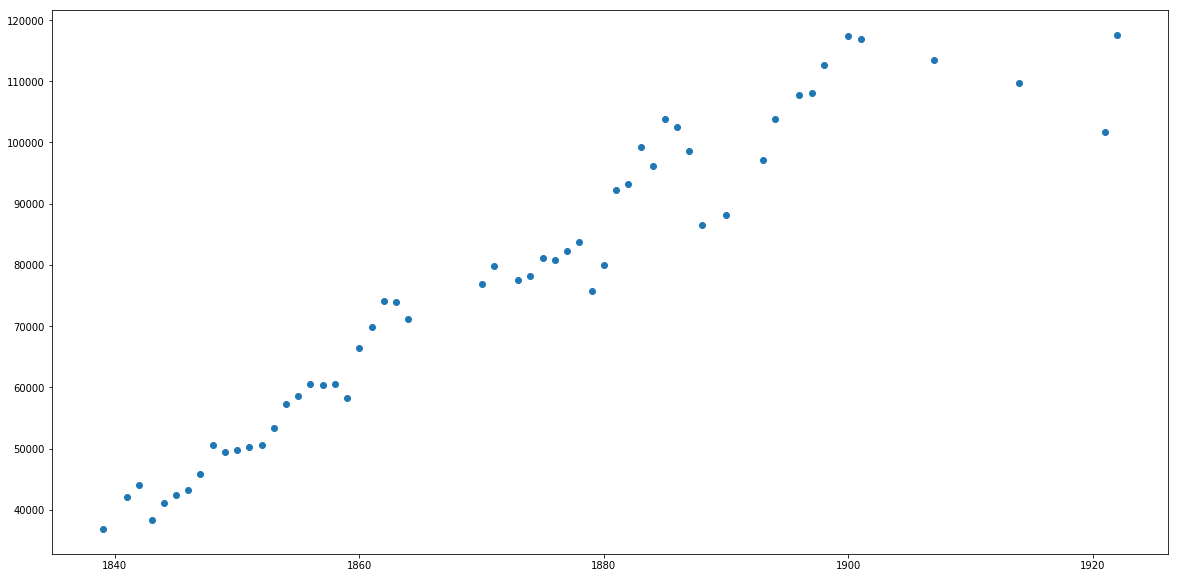

In [116]:
plt_df = df.groupby('annee')['Nom'].count().reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'], 'o')

In [78]:
df_geo = pd.read_csv('adresse_paris.csv', sep=';')
df_geo.head()

,Geometry X Y,Geometry,N_SQ_AD,N_VOIE,C_SUF1,C_SUF2,C_SUF3,C_AR,A_NVOIE,B_ANGLE,B_OFFSTDF,B_AFFSTDF,B_HORS75,L_NVOIE,L_ADR,N_SQ_AR,N_SQ_VO,OBJECTID
0,"48.8680239005, 2.3336589454","{""type"": ""Point"", ""coordinates"": [2.3336589454...",750005006,30,NaN,NaN,NaN,2,285.980011,O,O,NaN,N,30,30 AV DE L'OPERA,750000002,750005929,4646
1,"48.870831115, 2.34193739093","{""type"": ""Point"", ""coordinates"": [2.3419373909...",750006228,23,NaN,NaN,NaN,2,167.919998,O,O,NaN,N,23,23 GAL DES VARIETES,750000002,750005480,4783
2,"48.8637568839, 2.34100184986","{""type"": ""Point"", ""coordinates"": [2.3410018498...",750000265,17,NaN,NaN,NaN,1,37.180000,N,O,NaN,N,17,17 RUE DU BOULOI,750000001,750005949,4897
3,"48.8704457131, 2.34132568518","{""type"": ""Point"", ""coordinates"": [2.3413256851...",750004118,2,NaN,NaN,NaN,2,260.640015,O,O,NaN,N,2,2 GAL FEYDEAU,750000002,750005806,9030
4,"48.8691257702, 2.34304452078","{""type"": ""Point"", ""coordinates"": [2.3430445207...",750004758,125,NaN,NaN,NaN,2,109.000000,N,O,NaN,N,125,125 RUE MONTMARTRE,750000002,750005645,7658


In [81]:
df_geo[df_geo['L_ADR'].str.contains('RUE DE RICHELIEU')]

,Geometry X Y,Geometry,N_SQ_AD,N_VOIE,C_SUF1,C_SUF2,C_SUF3,C_AR,A_NVOIE,B_ANGLE,B_OFFSTDF,B_AFFSTDF,B_HORS75,L_NVOIE,L_ADR,N_SQ_AR,N_SQ_VO,OBJECTID
10,"48.8711520925, 2.33955717151","{""type"": ""Point"", ""coordinates"": [2.3395571715...",750005527,95,NaN,NaN,NaN,2,72.419998,O,O,NaN,N,95,95 RUE DE RICHELIEU,750000002,750005602,1696
12,"48.8668319878, 2.33734879222","{""type"": ""Point"", ""coordinates"": [2.3373487922...",750005506,57,NaN,NaN,NaN,2,70.669998,N,O,NaN,N,57,57 RUE DE RICHELIEU,750000002,750005602,1867
18,"48.8652882061, 2.33657047474","{""type"": ""Point"", ""coordinates"": [2.3365704747...",750001937,33,NaN,NaN,NaN,1,70.430000,N,O,NaN,N,33,33 RUE DE RICHELIEU,750000001,750005602,42609
29,"48.8670504206, 2.33746479526","{""type"": ""Point"", ""coordinates"": [2.3374647952...",750005508,61,NaN,NaN,NaN,2,70.690002,N,O,NaN,N,61,61 RUE DE RICHELIEU,750000002,750005602,49744
37,"48.8699867258, 2.33863746421","{""type"": ""Point"", ""coordinates"": [2.3386374642...",750164008,85,NaN,P,NaN,2,165.490005,N,O,NaN,N,85 P,85 P RUE DE RICHELIEU,750000002,750005602,27443
102,"48.8657109633, 2.33667692679","{""type"": ""Point"", ""coordinates"": [2.3366769267...",750001940,39,NaN,NaN,NaN,1,49.349998,O,O,NaN,N,39,39 RUE DE RICHELIEU,750000001,750005602,3020
103,"48.8663622877, 2.3373024315","{""type"": ""Point"", ""coordinates"": [2.3373024314...",750001972,52,NaN,NaN,NaN,1,250.860001,N,O,NaN,N,52,52 RUE DE RICHELIEU,750000001,750005602,3178
109,"48.8645037679, 2.33632636156","{""type"": ""Point"", ""coordinates"": [2.3363263615...",750001952,14,NaN,NaN,NaN,1,250.770004,N,O,NaN,N,14,14 RUE DE RICHELIEU,750000001,750005602,12980
115,"48.8700406608, 2.33921938463","{""type"": ""Point"", ""coordinates"": [2.3392193846...",750005544,84,NaN,NaN,NaN,2,252.470001,N,O,NaN,N,84,84 RUE DE RICHELIEU,750000002,750005602,6773
129,"48.8648498089, 2.33650941474","{""type"": ""Point"", ""coordinates"": [2.3365094147...",750001956,22,NaN,NaN,NaN,1,250.729996,N,O,NaN,N,22,22 RUE DE RICHELIEU,750000001,750005602,17582


In [23]:
distances = []
for items in tqdm(df['Rue'].str.lower().str.split()):
    dists = []
    for item in items:
        dists.append(editdistance.eval(richelieu, item))
    distances.append(min(dists))
distances = np.array(distances)

In [45]:
num_items_per_rue = df['Rue'].str.lower().str.split().apply(len)

In [203]:
df_sel = df[(distances <= 2) & (num_items_per_rue <= 100)]
len(df_sel)

23256

In [204]:
df_sel.sample(10)

,Doc ID,Nom,Métier,Rue,Numéro,annee
1227282,bpt6k6391515w,Commiogés,horloger,Richelieu,47 bis.,1847
2935756,bpt6k9762929c,Guilois (J.),plumassier.,Richelieu,25.,1879
119149,bpt6k62906378,Duguet,tailleur,Richelieu,51.,1846
743926,bpt6k63243601,Bigot,mercerie,Richelieu,29.,1839
3362479,bpt6k9763554c,Guilois (J.),plumassier,Richelieu,25.,1875
1139747,bpt6k6333200c,Mercier,médecin,Richelieu,10.,1862
802536,bpt6k6324389h,Guislin,propriétaire,Richelieu,108.,1859
1486279,bpt6k9669143t,Forestier (Mme),modes,Richelieu,18.,1882
1011591,bpt6k6331310g,Sanctus,costumier,Richelieu,17.,1844
1000449,bpt6k6331310g,Lemaire fils,dentiste,Richelieu,15.,1844


In [205]:
df_sel.loc[:, 'Numéro'] = df_sel['Numéro'].str.strip('.*').values
df_sel.loc[:, 'Numéro'] = df_sel['Numéro'].str.replace('\(.*\)', '').str.replace('[\. \*]', '').values
df_sel.loc[:, 'Numéro'] = df_sel['Numéro'].str.replace('[^\w\s]','').str.strip()

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [201]:
df_sel['Numéro'].str.replace('[^\w\s]','').str.strip().loc[3998584]

'92'

In [187]:
nums_richelieu = df_geo[df_geo['L_ADR'].str.contains('RUE DE RICHELIEU')]['N_VOIE'].astype(str).values

In [218]:
df_sel[df_sel['Numéro'].isin(nums_richelieu)]['Métier'].value_counts()

tailleur                                         3038
modes                                             658
tailleurs                                         571
bottier                                           461
couturière                                        361
médecin                                           319
coiffeur                                          261
vins                                              256
chemisier                                         162
libraire                                          155
fleuriste                                         153
épicier                                           148
dentiste                                          148
chapelier                                         147
banquiers                                         144
tabac                                             143
pharmacien                                        140
horloger                                          130
corsets                     

In [143]:
num_items_per_rue.loc[4095063]

3

In [211]:
df_sel[(df_sel['annee'] == 1921) & (~df_sel['Numéro'].isin(nums_richelieu))]

,Doc ID,Nom,Métier,Rue,Numéro,annee
3992868,bpt6k97774838,(lie). Roserate (la,) restaurant,r. de Richelieu,00Centr6860,1921
3993039,bpt6k97774838,Rustin et Pauly,opérations immobilières,r. de Richelieu,64pnjGut4074,1921
3993374,bpt6k97774838,.Seedorff-Barfred-Georgc (S. B. C.1,construc. teurs de fours,r. de Richelieu,21mCentr3032,1921
3993794,bpt6k97774838,"Société frang""",et Italienne des houillères de Dombrowa,r. de Richelieu,41Uer,1921
3994099,bpt6k97774838,(/9e). Sterlin (G. et R. Bricard suce.),serrurerie et quincaillerie marque S. T.,r. de Richelieu,39TICentr3394AdrtSTERBIUCARPARIS,1921
3995041,bpt6k97774838,Viallard 'K.) et A. Moulin (0A) (Henri Rocher ...,administrateurs et liqttiaateurs de sociétés,r. de Richelieu,92JTJOnt1120,1921
3995551,bpt6k97774838,Agence Parisienne (l'),renseignements,r. de Richelieu,45iJjLouv0429,1921
3995629,bpt6k97774838,(?r). -Alice (Mlle),modes,r. de Richelieu,17FnlLouv2709,1921
3995990,bpt6k97774838,Aucamus (Q 1) (R. Boussus suce.),feuilla.? ges et fleurs,r. de Richelieu,922evCentr4300,1921
3995991,bpt6k97774838,(lie). (I8') Aucante,plumassier,r. de Richelieu,k1,1921


In [200]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [210]:
df[(df['annee'] == 1921) & (distances < 2)]

,Doc ID,Nom,Métier,Rue,Numéro,annee
3992763,bpt6k97774838,Rocher (Henry) tgi,avocat-administrateur et liquidateur de sociétés:,r. de Richelieu,92. (2°).,1921
3992868,bpt6k97774838,(lie). Roserate (la,) restaurant,r. de Richelieu,(2e) 00 Centr. 68. 60.,1921
3993039,bpt6k97774838,Rustin et Pauly,opérations immobilières,r. de Richelieu,64. (2e). pnj Gut. 40. 74.,1921
3993092,bpt6k97774838,'Sainl-B!anC3rl,tailleurs,r. Richelieu,20.,1921
3993374,bpt6k97774838,.Seedorff-Barfred-Georgc (S. B. C.1,construc. teurs de fours,r. de Richelieu,21. (1er). m Centr. 30. 32.,1921
3993794,bpt6k97774838,"Société frang""",et Italienne des houillères de Dombrowa,r. de Richelieu,41. Uer).,1921
3994099,bpt6k97774838,(/9e). Sterlin (G. et R. Bricard suce.),serrurerie et quincaillerie marque S. T.,r. de Richelieu,39. (lor). [TICentr. 33. 94. Adr.<t*: STERBIUC...,1921
3994820,bpt6k97774838,van Becelaere,sertisseur,r. de Richelieu,38.,1921
3995041,bpt6k97774838,Viallard 'K.) et A. Moulin (0A) (Henri Rocher ...,administrateurs et liqttiaateurs de sociétés,r. de Richelieu,92. (5e). JTJ Ont. 11. 20.,1921
3995453,bpt6k97774838,/ Zivi et Cle,banquiers,r. de Richelieu,99.,1921


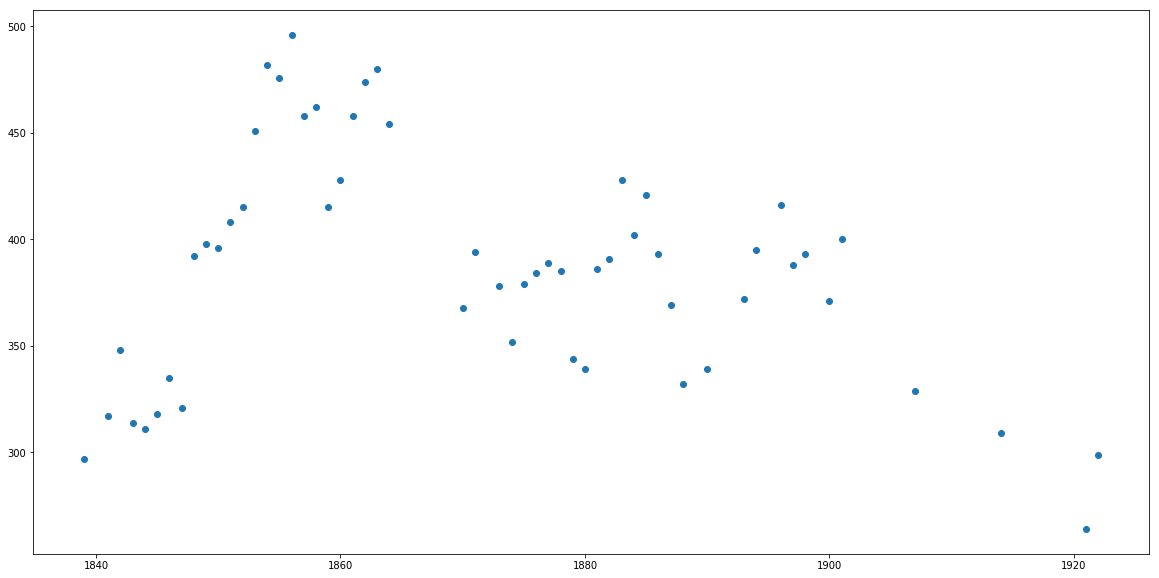

In [207]:
plt_df = df_sel[df_sel['Numéro'].isin(nums_richelieu)].groupby('annee')['Nom'].count().reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'], 'o')

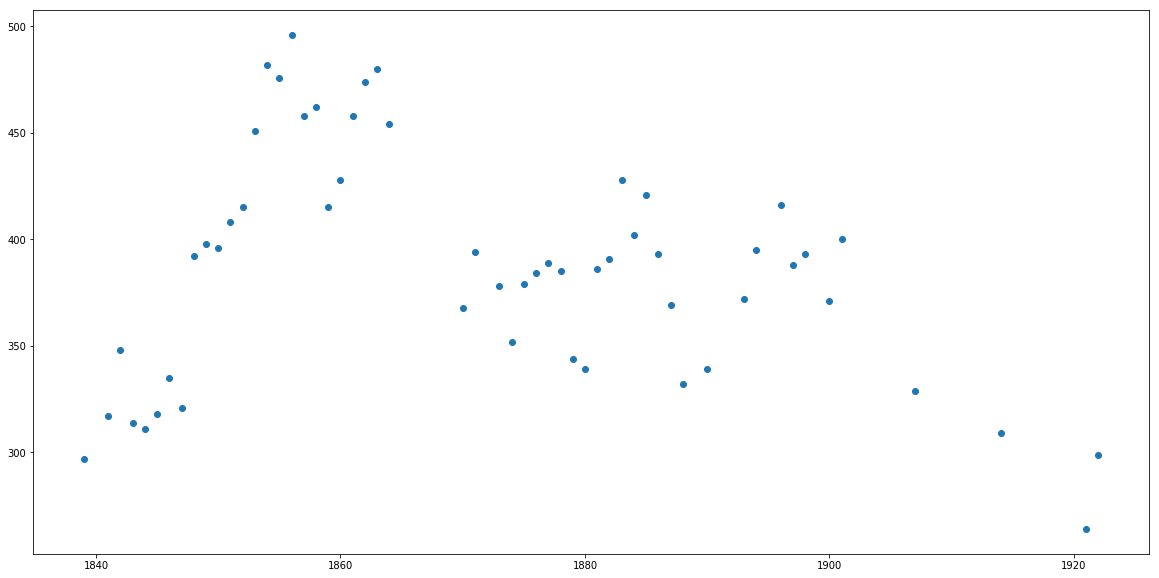

In [207]:
plt_df = df_sel[df_sel['Numéro'].isin(nums_richelieu)].groupby('annee')['Nom'].count().reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'], 'o')

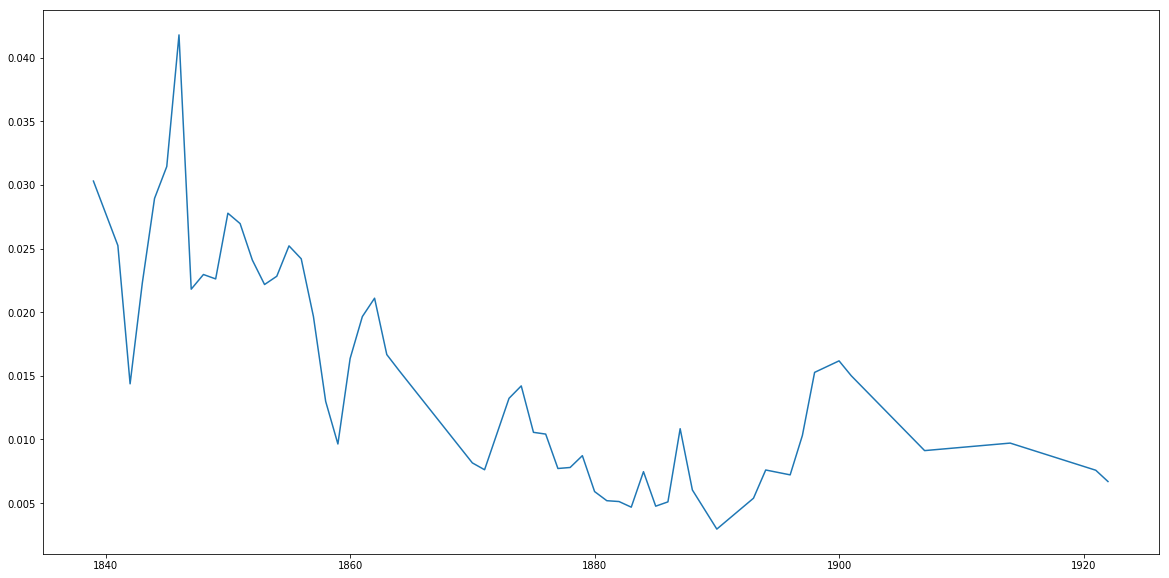

In [229]:
plt_df = (df_sel[df_sel['Numéro'].isin(nums_richelieu) & (df_sel["Métier"] == 'médecin')].groupby('annee')['Nom'].count()/df_sel[df_sel['Numéro'].isin(nums_richelieu)].groupby('annee')['Nom'].count()).reset_index()
plt.figure(figsize=(20,10))
plt.plot(plt_df['annee'], plt_df['Nom'])

In [225]:
plt_df

,annee,Nom
0,1839,0.131313
1,1841,0.141956
2,1842,0.158046
3,1843,0.171975
4,1844,0.192926
5,1845,0.185535
6,1846,0.214925
7,1847,0.218069
8,1848,0.214286
9,1849,0.178392


In [231]:
df_sel[df_sel['Numéro'].isin(nums_richelieu)].to_csv('richelieu.csv')

## Refined version

In [365]:
df_geo = pd.read_csv('adresse_paris.csv', sep=';')
df_geo = df_geo[df_geo['L_ADR'].str.contains('RUE DE RICHELIEU')]
df_geo.head()

,Geometry X Y,Geometry,N_SQ_AD,N_VOIE,C_SUF1,C_SUF2,C_SUF3,C_AR,A_NVOIE,B_ANGLE,B_OFFSTDF,B_AFFSTDF,B_HORS75,L_NVOIE,L_ADR,N_SQ_AR,N_SQ_VO,OBJECTID
10,"48.8711520925, 2.33955717151","{""type"": ""Point"", ""coordinates"": [2.3395571715...",750005527,95,NaN,NaN,NaN,2,72.419998,O,O,NaN,N,95,95 RUE DE RICHELIEU,750000002,750005602,1696
12,"48.8668319878, 2.33734879222","{""type"": ""Point"", ""coordinates"": [2.3373487922...",750005506,57,NaN,NaN,NaN,2,70.669998,N,O,NaN,N,57,57 RUE DE RICHELIEU,750000002,750005602,1867
18,"48.8652882061, 2.33657047474","{""type"": ""Point"", ""coordinates"": [2.3365704747...",750001937,33,NaN,NaN,NaN,1,70.430000,N,O,NaN,N,33,33 RUE DE RICHELIEU,750000001,750005602,42609
29,"48.8670504206, 2.33746479526","{""type"": ""Point"", ""coordinates"": [2.3374647952...",750005508,61,NaN,NaN,NaN,2,70.690002,N,O,NaN,N,61,61 RUE DE RICHELIEU,750000002,750005602,49744
37,"48.8699867258, 2.33863746421","{""type"": ""Point"", ""coordinates"": [2.3386374642...",750164008,85,NaN,P,NaN,2,165.490005,N,O,NaN,N,85 P,85 P RUE DE RICHELIEU,750000002,750005602,27443


In [505]:
df = pd.read_csv("richelieu_refined.csv")
df = df.iloc[:, 1:]
df.head()

,Doc ID,Nom,Métier,Rue,Numéro,annee
0,bpt6k6282019m,Bosviel,avocat au conseil d'Etat et à la cour de cassa...,Hichelien,60,1855
1,bpt6k6282019m,Braquehais,artlste-photogtaphe,Richelieu,110,1855
2,bpt6k6282019m,chiûou et Parenthou jeune,confection en gros,Chaise (J.) iNffi.bij.-joaillier. Richelieu,10,1855
3,bpt6k6282019m,Chantal (Mme),eau Chantai pour teindre les cheveux,Richelieu,65,1855
4,bpt6k6282019m,Choisy (Ernest de),éditeur du Court ât la Banque et de la Bourie,Richelieu,79,1855


In [250]:
jobs_counts = df['Métier'].value_counts()

In [511]:
jobs_counts/jobs_counts.sum()*100

tailleur                                                                                17.926679
modes                                                                                    3.281413
bottier                                                                                  2.312660
couturière                                                                               2.079970
médecin                                                                                  1.548105
coiffeur                                                                                 1.282173
banquier                                                                                 1.267927
vins                                                                                     1.229936
bijoutier-joaillier                                                                      1.073226
avoué de 1ère instance                                                                   0.954507
chemisier           

In [279]:
jobs_selection = jobs_counts.iloc[:100].index.values

In [291]:
job = jobs_counts.iloc[:10].index.values[0]

In [311]:
import seaborn as sns

In [330]:
df['decade'] = df['annee'] - df['annee'] % 10

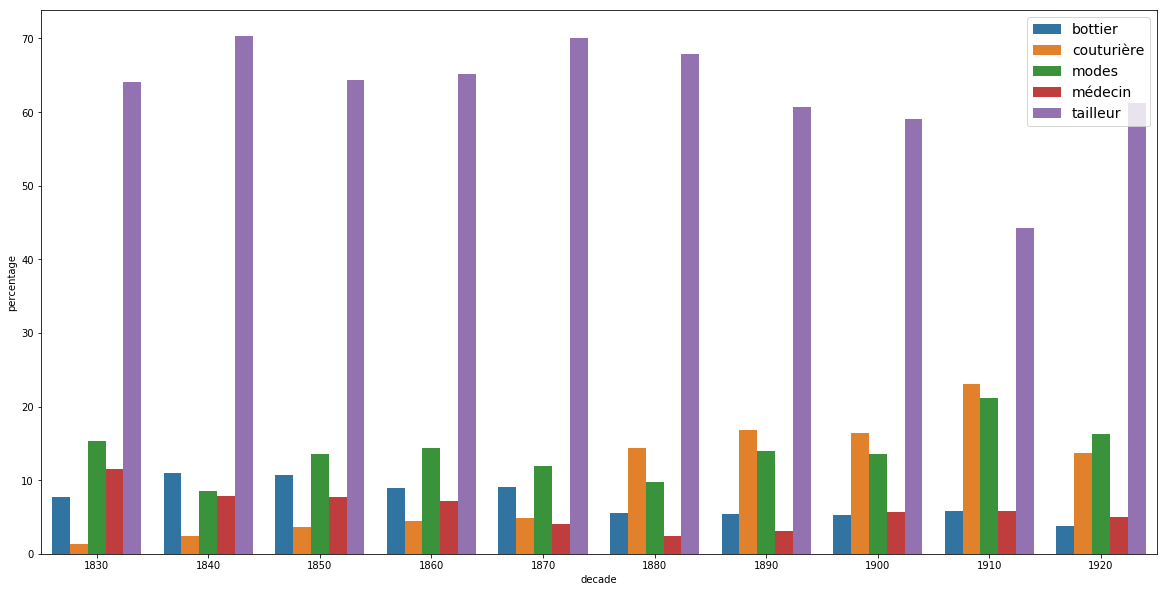

In [361]:
job_sel = jobs_counts.iloc[0:5].index.values
df_sel = df[df['Métier'].isin(job_sel)]
job_count = (df_sel
             .groupby('decade')['Métier']
             .value_counts(normalize=True)
             .rename('percentage')
             .mul(100)
             .reset_index()
             .sort_values('Métier'))
plt.figure(figsize=(20,10))
sns.barplot(x='decade', y='percentage', hue='Métier', data=job_count)
plt.legend(loc=1, prop={'size': 14});

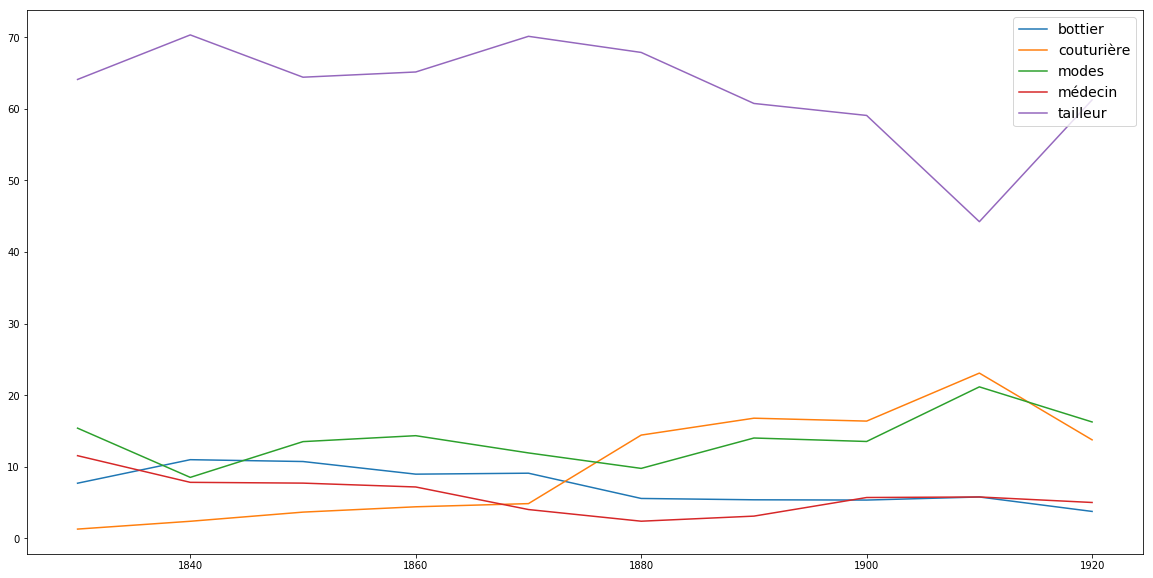

In [362]:
plt.figure(figsize=(20,10))
job_sel = sorted(job_sel)
job_count = job_count.sort_values('decade')
for job in job_sel:
    tmp = job_count[job_count['Métier'] == job]
    plt.plot(tmp['decade'], tmp['percentage'])
plt.legend(job_sel, loc=1, prop={'size': 14});

In [409]:
df_geo = pd.concat([df_geo, df_geo['Geometry X Y'].str.split(',', expand=True).rename(columns={0:'lat', 1:'lon'}).astype(float)], axis=1)

In [411]:
df_georef = df.set_index('Numéro').join(df_geo.set_index('N_VOIE')[['lat', 'lon']]).reset_index()

In [412]:
df_georef

,index,Doc ID,Nom,Métier,Rue,annee,decade,lat,lon
0,1,bpt6k6286466w,Patard,tailleur,Richelieu,1842,1840,48.864018,2.335872
1,1,bpt6k6286466w,Poitevin,bonnetier,Richelieu,1842,1840,48.864018,2.335872
2,1,bpt6k6286466w,Sanson jeune,directeur de la banque philanthropique,pl. Richelieu,1842,1840,48.864018,2.335872
3,1,bpt6k62906378,Bonnin,vins,RichelIeu,1846,1840,48.864018,2.335872
4,1,bpt6k62906378,Chaufïy,épicerie,place Richelieu,1846,1840,48.864018,2.335872
5,1,bpt6k62906378,Cochet,tailleur,place Richelieu,1846,1840,48.864018,2.335872
6,1,bpt6k62906378,Fischer et Hartmann,toillenrs,pl. Richelieu,1846,1840,48.864018,2.335872
7,1,bpt6k62906378,Loyer frères,tailleur,Richelieu,1846,1840,48.864018,2.335872
8,1,bpt6k62906378,Maillot. directeur du Monde musical,placeur,Richelieu,1846,1840,48.864018,2.335872
9,1,bpt6k62906378,Maliet,tailleur,pl. Richelieu,1846,1840,48.864018,2.335872


In [437]:
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster 

In [446]:
map_richelieu = folium.Map(location=[df_georef['lat'].mean(), 
                                df_georef['lon'].mean()], 
                      zoom_start=15)

colors = ['red', 'green', 'blue', 'yellow', 'pink']

for idx, j in enumerate(job_sel):
    callback = ("""function (row) {
                var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "%s",  radius: 2});
                return circle};"""%colors[idx])
    mc = FastMarkerCluster(df_georef[df_georef['Métier'] == j][['lat', 'lon']].values.tolist(), callback=callback)       
    map_richelieu.add_child(mc)
map_richelieu

In [454]:
map_richelieu = folium.Map(location=[df_georef['lat'].mean(), 
                                df_georef['lon'].mean()], 
                      zoom_start=15)
mc = MarkerCluster()
for nom, metier, annee, numero, lat, lon in df_georef[(df_georef['decade'] == 1850)][['Nom', 'Métier', 'annee', 'index', 'lat', 'lon']].values:
    text = "%s un %s habitait en %d au %d rue Richelieu"%(nom, metier, annee, numero)
#     popup = folium.Popup(text, parse_html=True)
    mc.add_child(folium.Marker(location=[lat,  lon]))
map_richelieu.add_child(mc)

In [452]:
map_richelieu.save('test.html')

In [455]:
len(df)

21058